In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/3 [00:00<?, ?engine/s]

In [ ]:
learning_rates = [0.25]

dfca_li = []
dfca_gi = []
ifca = []

In [ ]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)
learning_rates = [0.25]

dfca_li = []
dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the dfca-li experiment


In [6]:
%%px --target 1 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_li.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_li.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [7]:
%%px --target 2 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

Experiment Final Results: 

In [8]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_li = rc[1].pull('dfca_li', block=True)
ifca = rc[2].pull('ifca', block=True)

unknown:   0%|          | 0/3 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 3.850 a 0.024 clct[np.int64(121), np.int64(79)] cl_acc 0.555  3.506sec
Epoch -1 tst: l 3.850 a 0.023 clct[np.int64(25), np.int64(15)] cl_acc 0.575  0.302sec
Epoch 0 tr: l 3.846 a 0.027 clct[np.int64(99), np.int64(101)] cl_acc 0.615  lr 0.100000 11.900sec(train) 3.971sec(infer)
Epoch 0 tst: l 3.847 a 0.026 clct[np.int64(20), np.int64(20)] cl_acc 0.600  0.960sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 3.842 a 0.028 clct[np.int64(71), np.int64(129)] cl_acc 0.655  lr 0.100000 8.718sec(train) 2.459sec(infer)
Epoch 1 tst: l 3.843 a 0.028 clct[np.int64(11), np.int64(29)] cl_acc

In [9]:
__.display_outputs()

---------------------------------DFCA-LI, lr: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': False, 'local_model_init': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_li'}
Using device: cuda
<class 'list'>
<class 'list'>
Epoch -1 tr: l 3.850 a 0.023 clct[np.int64(100), np.int64(100)] cl_acc 0.510  2.620sec
Epoch -1 tst: l 3.850 a 0.025 clct[np.int64(19), np.int64(21)] cl_acc 0.575  0.975sec
Epoch 0 tr: l 3.848 a 0.027 clct[np.int64(101), np.int64(99)] cl_acc 0.525  lr 0.100000 11.259sec(train) 2.519sec(infer)
Epoch 0 tst: l 3.850 a 0.025 clct[np.int64(19), np.int64(21)] cl_acc 0.575  1.346sec
result written at output_dfca_li/results.pickle
checkpoint written at output_dfca_li/checkpoint.pt
Epoch 1 tr: l 3.849 a 0.024 clct[np.int64(101), np.int64(99)] cl_acc 0.535  lr 0.100000 11.217sec(train) 2.151sec(infer

In [10]:
___.display_outputs()

---------------------------------DFCA-LI, lr: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': False, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
<class 'list'>
<class 'list'>
Epoch -1 tr: l 3.850 a 0.024 clct[np.int64(108), np.int64(92)] cl_acc 0.600  2.096sec
Epoch -1 tst: l 3.851 a 0.026 clct[np.int64(21), np.int64(19)] cl_acc 0.625  0.689sec
Epoch 0 tr: l 3.843 a 0.030 clct[np.int64(97), np.int64(103)] cl_acc 0.605  lr 0.100000 8.644sec(train) 2.420sec(infer)
Epoch 0 tst: l 3.847 a 0.031 clct[np.int64(18), np.int64(22)] cl_acc 0.650  0.893sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 3.838 a 0.035 clct[np.int64(65), np.int64(135)] cl_acc 0.645  lr 0.100000 9.755sec(train) 3.460sec(infer)


{'test_loss': [[3.8505428993701933, 3.845565413236618, 3.839700464010239, 3.8322802567481995, 3.821775492429733, 3.8057411885261536, 3.7804448211193082, 3.7388802921772006, 3.6695794034004208, 3.561684218645096, 3.4473725843429563, 3.326176074743271, 3.1237062048912048, 2.938415619134903, 2.794421837329865, 2.6417751908302307, 2.525410331487656, 2.368318219184876, 2.3043619775772095, 2.263117495179176, 2.139678535461426, 2.014229360818863, 1.9822138059139252, 1.9277704912424085, 1.8797142904996875, 1.8657693469524381, 1.780847986936569, 1.767639244794846, 1.7603068643808364, 1.6912200814485547, 1.6735374546051027, 1.627391887307167, 1.6061330091953276, 1.5773990404605867, 1.5436178249120713, 1.5232575362920762, 1.5109099644422532, 1.4727761429548263, 1.4466342949867248, 1.4598136115074158, 1.4166109603643418, 1.412674079835415, 1.4003802707791326, 1.3611263704299925, 1.3517818808555604, 1.3371529209613802, 1.3138545206189156, 1.3034051352739333, 1.2956882494688036, 1.271030412018299, 1

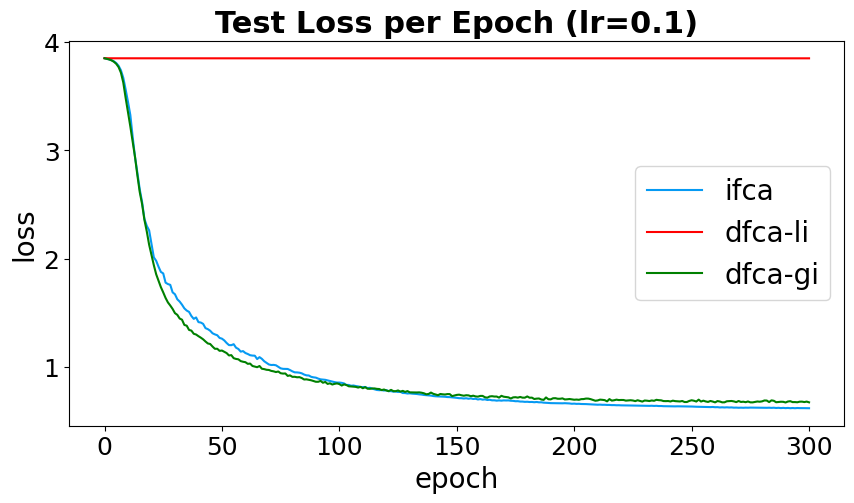

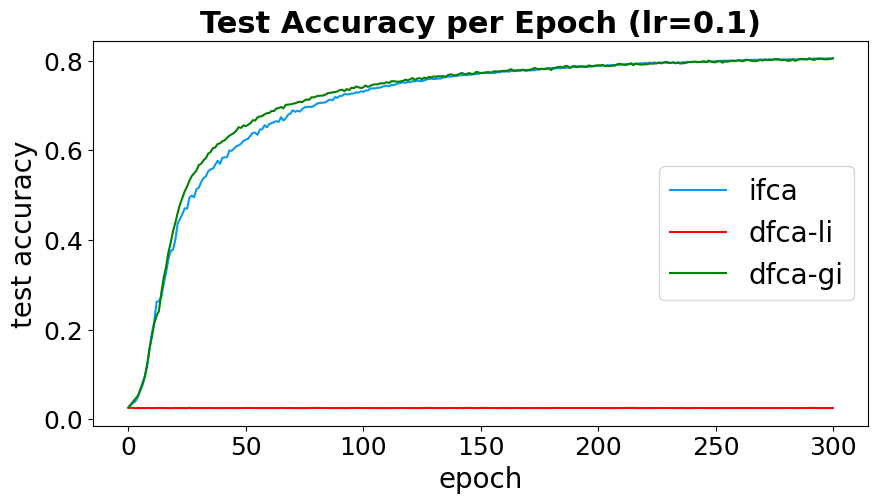

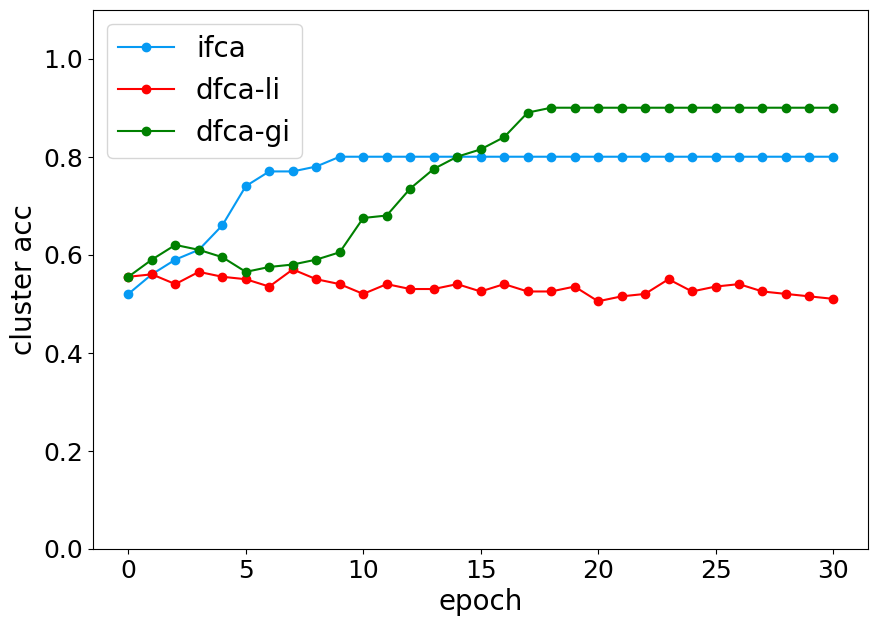

In [11]:

r_ifca = {}
r_dfca_gi = {}
r_dfca_li = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])

r_dfca_li['test_loss'] = []
r_dfca_li['test_acc'] = []
r_dfca_li['cl_acc'] = []
for i in range(len(learning_rates)):
    r_dfca_li['test_loss'].append(dfca_li[i][0])
    r_dfca_li['test_acc'].append(dfca_li[i][1])
    r_dfca_li['cl_acc'].append(dfca_li[i][2])

print(r_ifca)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_loss'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_acc'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_li['cl_acc'][l][:31], label='dfca-li', color='red', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', 'cluster_acc.png'))